# Global Alignment
Implement [Needleman–Wunsch](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm) algorithm for Global Pairwise sequence alignment.  
It's time and space complexity is `O(mn)`.

In [1]:
%matplotlib inline
import pandas as pd

from Bio import pairwise2
from Bio.SubsMat.MatrixInfo import blosum62
from Bio import SeqIO
from Bio.Seq import Seq

from Bio.SubsMat import SeqMat

In [2]:
# seq1 = SeqIO.read("inputs/alpha.faa", "fasta")
# seq2 = SeqIO.read("inputs/beta.faa", "fasta")
# alignments = pairwise2.align.globalds(seq1.seq, seq2.seq, blosum62, -10, -0.5)

In [3]:
df = pd.read_csv("inputs/score_matrix_small.csv", header=0, index_col=0)

In [4]:
data = df.stack().to_dict()

In [42]:
seq1 = Seq("MALDGIRMPDGCYADGTWELSVHVTDLNRDVTLRVTGEVHIGGVMLKLVEKLDVKKDWSDHALWWEKKRTWLLKTHWTLDKYGIQADAKLQFTPQHKLLRLQLPNMKYVKVKVNFSDRVFKAVSDICKTFNIRHPEELSLLKKPRDPTKKKKKKLDDQSEDEALELEGPLITPGSGSIYSSPGLYSKTMTPTYDAHDGSPLSPTSAWFGDSALSEGNPGILAVSQPITSPEILAKMFKPQALLDKAKINQGWLDSSRSLMEQDVKENEALLLRFKYYSFFDLNPKYDAIRINQLYEQAKWAILLEEIECTEEEMMMFAALQYHINKLSIMTSENHLNNSDKEVDEVDAALSDLEITLEGGKTSTILGDITSIPELADYIKVFKPKKLTLKGYKQYWCTFKDTSISCYKSKEESSGTPAHQMNLRGCEVTPDVNISGQKFNIKLLIPVAEGMNEIWLRCDNEKQYAHWMAACRLASKGKTMADSSYNLEVQNILSFLKMQHLNPDPQLIPEQITTDITPECLVSPRYLKKYKNKQPGYIRDLITARILEAHQNVAQMSLIEAKMRFIQAWQSLPEFGITHFIARFQGGKKEELIGIAYNRLIRMDASTGDAIKTWRFSNMKQWNVNWEIKMVTVEFADEVRLSFICTEVDCKVVHEFIGGYIFLSTRAKDQNESLDEEMFYKLTSGWV")
seq2 = Seq("MAGMKTASGDYIDSSWELRVFVGEEDPEAESVTLRVTGESHIGGVLLKIVEQINRKQDWSDHAIWWEQKRQWLLQTHWTLDKYGILADARLFFGPQHRPVILRLPNRRALRLRASFSQPLFQAVAAICRLLSIRHPEELSLLRAPEKKEKKKKEKEPEEELYDLSKVVLAGGVAPALFRGMPAHFSDSAQTEACYHMLSRPQPPPDPLLLQRLPRPSSLSDKTQLHSRWLDSSRCLMQQGIKAGDALWLRFKYYSFFDLDPKTDPVRLTQLYEQARWDLLLEEIDCTEEEMMVFAALQYHINKLSQSGEVGEPAGTDPGLDDLDVALSNLEVKLEGSAPTDVLDSLTTIPELKDHLRIFRPRKLTLKGYRQHWVVFKETTLSYYKSQDEAPGDPIQQLNLKGCEVVPDVNVSGQKFCIKLLVPSPEGMSEIYLRCQDEQQYARWMAGCRLASKGRTMADSSYTSEVQAILAFLSLQRTGSGGPGNHPHGPDASAEGLNPYGLVAPRFQRKFKAKQLTPRILEAHQNVAQLSLAEAQLRFIQAWQSLPDFGISYVMVRFKGSRKDEILGIANNRLIRIDLAVGDVVKTWRFSNMRQWNVNWDIRQVAIEFDEHINVAFSCVSASCRIVHEYIGGYIFLSTRERARGEELDEDLFLQLTGGHEAF")


In [43]:
submat = SeqMat(data)

In [44]:
counter =0
for a in pairwise2.align.globalxx(seq1, seq2):
    print(pairwise2.format_alignment(*a))
    counter += 1
    print(counter)
    if(counter==5):
        break
    


MALDGIRMPD----GC-YA-DGT--WELS-VH-VTDLNR---D-----VTLRVTGEV-HIGGVMLKLVEKLD-VK-----K-DWSDHAL-WWEK-KRT-WLLK-THWTLDKYGIQ-ADAK-LQFT--PQHKLLR---LQ-LPNMKYVKVKVN---------FSDRV---FK-AVSD--ICKTFN----IRHPEELSLLKKPRD-PT-KK-KKKKLDDQSED-EAL-ELEGP-LITPGSGSIYSSPG-LYSKTMTPTYD---AHDGS---P-LS----PTSAW-FG-DSALS--EGNPGILAV-----S--QPITSPEILAKMFKP-----QA-L-----L-DKAKIN-QG----WLDSSRS-LMEQDV---KENEAL---L-LRFKYYSFFDLN-PKY-DAI--RIN--QLYEQAK-WAI-LL-EEIE-CTEEEMMM-FAALQYHINKLSIMT-S-ENH----------LNNSDKEVDEV-DA-ALSD-LEIT--LEGGKTS--TI--LGDITS---IPELA-DY---IKVFK-PK-KLTLKGYK-QY-WCT--FKD-TSI--SCY-KSKE--ESS--GT-PAH-QM--NLR-GCEVT-PDVNI-SGQKFN-IKLLIPVA---EGMN-EIW-LRC-DNEKQ-YAH-WMAA-CRLASKGK-TMADSSYNL--EVQN-ILS-FLKMQH-LN-------PD---PQLI--PEQITTDITP---EC-LVS-PRY-LK-------KY-KN-KQPGYIRDLITA-RILEAHQNVAQM-SLI-EAKM--RFIQAWQSLPE-FGITHFIA-----RFQGGK---KE-ELI-GIAYN-RLIRM-D-AST-GDAI--KTWRFSNMK-QWNVNWE-IKMVT--V--EFADE---VRLS-FI-CTEVD---CKV--VHEF-IGGYIFLSTR--AKDQN--ES-LDEEM--FYKL--TSGWV-----
||  |  |      |  |  |    |||  |  |        |  

In [45]:
#for n in range(len(seq1)):
#    print(seq1[n:n+3])

In [46]:
gop = -10; gep = -0.5
#alignments = pairwise2.align.globalds(seq1, seq2, submat, gop, gep)
alignments = pairwise2.align.globalxx(seq1, seq2)

In [47]:
def print_alignment(ind):
    return pairwise2.format_alignment(*alignments[ind])

In [48]:
print_alignment(0)

'MALDGIRMPD----GC-YA-DGT--WELS-VH-VTDLNR---D-----VTLRVTGEV-HIGGVMLKLVEKLD-VK-----K-DWSDHAL-WWEK-KRT-WLLK-THWTLDKYGIQ-ADAK-LQFT--PQHKLLR---LQ-LPNMKYVKVKVN---------FSDRV---FK-AVSD--ICKTFN----IRHPEELSLLKKPRD-PT-KK-KKKKLDDQSED-EAL-ELEGP-LITPGSGSIYSSPG-LYSKTMTPTYD---AHDGS---P-LS----PTSAW-FG-DSALS--EGNPGILAV-----S--QPITSPEILAKMFKP-----QA-L-----L-DKAKIN-QG----WLDSSRS-LMEQDV---KENEAL---L-LRFKYYSFFDLN-PKY-DAI--RIN--QLYEQAK-WAI-LL-EEIE-CTEEEMMM-FAALQYHINKLSIMT-S-ENH----------LNNSDKEVDEV-DA-ALSD-LEIT--LEGGKTS--TI--LGDITS---IPELA-DY---IKVFK-PK-KLTLKGYK-QY-WCT--FKD-TSI--SCY-KSKE--ESS--GT-PAH-QM--NLR-GCEVT-PDVNI-SGQKFN-IKLLIPVA---EGMN-EIW-LRC-DNEKQ-YAH-WMAA-CRLASKGK-TMADSSYNL--EVQN-ILS-FLKMQH-LN-------PD---PQLI--PEQITTDITP---EC-LVS-PRY-LK-------KY-KN-KQPGYIRDLITA-RILEAHQNVAQM-SLI-EAKM--RFIQAWQSLPE-FGITHFIA-----RFQGGK---KE-ELI-GIAYN-RLIRM-D-AST-GDAI--KTWRFSNMK-QWNVNWE-IKMVT--V--EFADE---VRLS-FI-CTEVD---CKV--VHEF-IGGYIFLSTR--AKDQN--ES-LDEEM--FYKL--TSGWV-----\n||  |  |      |  |  |    |||  |  |        |

In [49]:
print(pairwise2.format_alignment(*alignments[0]))

MALDGIRMPD----GC-YA-DGT--WELS-VH-VTDLNR---D-----VTLRVTGEV-HIGGVMLKLVEKLD-VK-----K-DWSDHAL-WWEK-KRT-WLLK-THWTLDKYGIQ-ADAK-LQFT--PQHKLLR---LQ-LPNMKYVKVKVN---------FSDRV---FK-AVSD--ICKTFN----IRHPEELSLLKKPRD-PT-KK-KKKKLDDQSED-EAL-ELEGP-LITPGSGSIYSSPG-LYSKTMTPTYD---AHDGS---P-LS----PTSAW-FG-DSALS--EGNPGILAV-----S--QPITSPEILAKMFKP-----QA-L-----L-DKAKIN-QG----WLDSSRS-LMEQDV---KENEAL---L-LRFKYYSFFDLN-PKY-DAI--RIN--QLYEQAK-WAI-LL-EEIE-CTEEEMMM-FAALQYHINKLSIMT-S-ENH----------LNNSDKEVDEV-DA-ALSD-LEIT--LEGGKTS--TI--LGDITS---IPELA-DY---IKVFK-PK-KLTLKGYK-QY-WCT--FKD-TSI--SCY-KSKE--ESS--GT-PAH-QM--NLR-GCEVT-PDVNI-SGQKFN-IKLLIPVA---EGMN-EIW-LRC-DNEKQ-YAH-WMAA-CRLASKGK-TMADSSYNL--EVQN-ILS-FLKMQH-LN-------PD---PQLI--PEQITTDITP---EC-LVS-PRY-LK-------KY-KN-KQPGYIRDLITA-RILEAHQNVAQM-SLI-EAKM--RFIQAWQSLPE-FGITHFIA-----RFQGGK---KE-ELI-GIAYN-RLIRM-D-AST-GDAI--KTWRFSNMK-QWNVNWE-IKMVT--V--EFADE---VRLS-FI-CTEVD---CKV--VHEF-IGGYIFLSTR--AKDQN--ES-LDEEM--FYKL--TSGWV-----
||  |  |      |  |  |    |||  |  |        |  

In [50]:
x = list(alignments[0][0])
x

['M',
 'A',
 'L',
 'D',
 'G',
 'I',
 'R',
 'M',
 'P',
 'D',
 '-',
 '-',
 '-',
 '-',
 'G',
 'C',
 '-',
 'Y',
 'A',
 '-',
 'D',
 'G',
 'T',
 '-',
 '-',
 'W',
 'E',
 'L',
 'S',
 '-',
 'V',
 'H',
 '-',
 'V',
 'T',
 'D',
 'L',
 'N',
 'R',
 '-',
 '-',
 '-',
 'D',
 '-',
 '-',
 '-',
 '-',
 '-',
 'V',
 'T',
 'L',
 'R',
 'V',
 'T',
 'G',
 'E',
 'V',
 '-',
 'H',
 'I',
 'G',
 'G',
 'V',
 'M',
 'L',
 'K',
 'L',
 'V',
 'E',
 'K',
 'L',
 'D',
 '-',
 'V',
 'K',
 '-',
 '-',
 '-',
 '-',
 '-',
 'K',
 '-',
 'D',
 'W',
 'S',
 'D',
 'H',
 'A',
 'L',
 '-',
 'W',
 'W',
 'E',
 'K',
 '-',
 'K',
 'R',
 'T',
 '-',
 'W',
 'L',
 'L',
 'K',
 '-',
 'T',
 'H',
 'W',
 'T',
 'L',
 'D',
 'K',
 'Y',
 'G',
 'I',
 'Q',
 '-',
 'A',
 'D',
 'A',
 'K',
 '-',
 'L',
 'Q',
 'F',
 'T',
 '-',
 '-',
 'P',
 'Q',
 'H',
 'K',
 'L',
 'L',
 'R',
 '-',
 '-',
 '-',
 'L',
 'Q',
 '-',
 'L',
 'P',
 'N',
 'M',
 'K',
 'Y',
 'V',
 'K',
 'V',
 'K',
 'V',
 'N',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'F',
 'S',
 'D',
 'R',
 'V',
 '-'

In [51]:
y = list(alignments[0][1])
y

['M',
 'A',
 '-',
 '-',
 'G',
 '-',
 '-',
 'M',
 '-',
 '-',
 'K',
 'T',
 'A',
 'S',
 'G',
 '-',
 'D',
 'Y',
 '-',
 'I',
 'D',
 '-',
 '-',
 'S',
 'S',
 'W',
 'E',
 'L',
 '-',
 'R',
 'V',
 '-',
 'F',
 'V',
 '-',
 '-',
 '-',
 '-',
 '-',
 'G',
 'E',
 'E',
 'D',
 'P',
 'E',
 'A',
 'E',
 'S',
 'V',
 'T',
 'L',
 'R',
 'V',
 'T',
 'G',
 'E',
 '-',
 'S',
 'H',
 'I',
 'G',
 'G',
 'V',
 '-',
 'L',
 '-',
 'L',
 '-',
 '-',
 'K',
 '-',
 '-',
 'I',
 'V',
 '-',
 'E',
 'Q',
 'I',
 'N',
 'R',
 'K',
 'Q',
 'D',
 'W',
 'S',
 'D',
 'H',
 'A',
 '-',
 'I',
 'W',
 'W',
 'E',
 '-',
 'Q',
 'K',
 'R',
 '-',
 'Q',
 'W',
 'L',
 'L',
 '-',
 'Q',
 'T',
 'H',
 'W',
 'T',
 'L',
 'D',
 'K',
 'Y',
 'G',
 'I',
 '-',
 'L',
 'A',
 'D',
 'A',
 '-',
 'R',
 'L',
 '-',
 'F',
 '-',
 'F',
 'G',
 'P',
 'Q',
 'H',
 '-',
 '-',
 '-',
 'R',
 'P',
 'V',
 'I',
 'L',
 '-',
 'R',
 'L',
 'P',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'N',
 'R',
 'R',
 'A',
 'L',
 'R',
 'L',
 'R',
 'A',
 'S',
 'F',
 'S',
 '-',
 '-',
 '-',
 'Q'

<IPython.core.display.Javascript object>


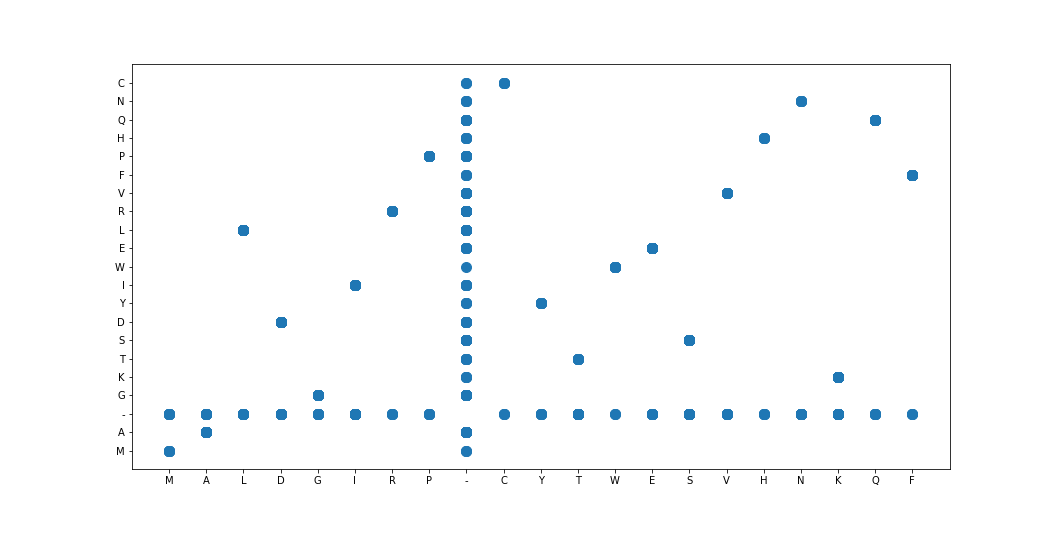

In [54]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


names = np.array(list(x))
c = np.random.randint(1,5,size=15)


norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()

sc = plt.scatter(x,y, s=100)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)
annot.set_fontsize(20)


def kmerSeq():
    kmer = [seq1[n:n+3] for n in range(len(seq1))]
    print(kmer)
    

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    
    
    text = "{},{},{},{}".format(" ".join([names[n] for n in ind["ind"]]),
                          " ".join([y[n] for n in ind["ind"]]),
                        " ".join("\n\n"),
                        " ".join([str(pairwise2.format_alignment(*alignments[n])) for n in ind["ind"]]))
                                  # " ".join([y[n] for n in ind["ind"]]))

    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()
#kmerSeq()


<IPython.core.display.Javascript object>


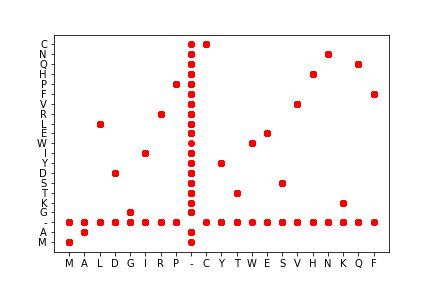

In [55]:
%matplotlib notebook
plt.plot(list(x), list(y), "ro")

<IPython.core.display.Javascript object>


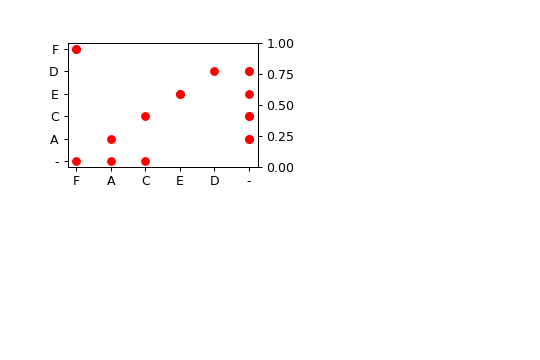

ValueError: x and y must have same first dimension, but have shapes (17,) and (14,)

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

#x = np.sort(np.random.rand(15))
#y = np.sort(np.random.rand(15))
y2 = np.sort(np.random.rand(14))

fig = plt.figure()
ax1 = plt.subplot(2, 2, 1)
line1, = plt.plot(x,y,'ro')


ax2 = ax1.twinx()
line2, = ax2.plot(x, y2, color='green')
ax2.tick_params(axis='y', labelcolor='green')

annots = []
for ax in [ax1, ax2]:
    annot = ax1.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w", alpha=0.4),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)
    annots.append(annot)

annot_dic = dict(zip([ax1, ax2], annots))
line_dic = dict(zip([ax1, ax2], [line1, line2]))

def update_annot(line, annot, ind):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "x = {}\ny= {}".format(x[ind["ind"][0]], y[ind["ind"][0]])
    annot.set_text(text)

def hover(event):

    if event.inaxes in [ax1, ax2]:
        for ax in [ax1, ax2]:
            cont, ind = line_dic[ax].contains(event)
            annot = annot_dic[ax]
            if cont:
                update_annot(line_dic[ax], annot, ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if annot.get_visible():
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()